In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Using model from full training set

finding the Micromonas related sequences from full set

```
  cd /global/projectb/scratch/qpzhang/Run_Genelearn/Full_nextflow
  more all_segment.fa.header|grep "296587:24" >296587.title
  more all_segment.fa.header |grep 564608 >564608.title &
  more all_segment.fa.header |grep "16/38832" >38832.title &

 ```

In Training set: 

Micromonas (genus level) has two strains...


There are 200 x 2 segments from this genome... for the two strains

taxid = 296587... Micromonas commoda

https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?mode=Info&id=296587&lvl=3&lin=f&keep=1&srchmode=1&unlock

and

taxid = 564608   Micromonas pusilla CCMP1545

https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?mode=Info&id=564608&lvl=3&lin=f&keep=1&srchmode=1&unlock




Micromonas

Taxonomy ID: 38832
Inherited blast name: green algae
Rank: genus



https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?mode=Info&id=38832&lvl=3&lin=f&keep=1&srchmode=1&unlock




genome downloaded from NCBI 

https://www.ncbi.nlm.nih.gov/genome/501

Micromonas pusilla
Representative genome: Micromonas pusilla CCMP1545 (assembly Micromonas pusilla CCMP1545 v2.0)
Download sequences in FASTA format for genome, transcript, protein
Download genome annotation in GFF, GenBank or tabular format
BLAST against Micromonas pusilla genome 

Lineage: Eukaryota[2434]; Viridiplantae[265]; Chlorophyta[33]; prasinophytes[9]; Mamiellophyceae[8]; Mamiellales[8]; Mamiellaceae[3]; Micromonas[3]; Micromonas pusilla[1]

GCF_000151265.2_Micromonas_pusilla_CCMP1545_v2.0_genomic.fna

shredding into 200 segments



```
python ~/Dropbox/Development/Github/jgi-ViCA/scripts/shred.py --input GCF_000151265.2_Micromonas_pusilla_CCMP1545_v2.0_genomic.fna --output shred.fa --samples 200

python ~/Dropbox/Development/Github/jgi-ViCA/scripts/prediction_pipeline_lite_noPfam_sklearn.py shred.fa shred.fa.score ~/bin/genemark_suite_macosx/gmsuite/ ~/Dropbox/Development/Github/jgi-ViCA/scripts/model/all_segment.fasta.vect.feature_index ~/Dropbox/Development/Github/jgi-ViCA/scripts/model/Sklearn/all_segment.fasta.vect.family.training.svmlib.no4.0_1_scikit_model_median_True_1x ~/Dropbox/Development/Github/jgi-ViCA/scripts/model/Sklearn/all_segment.fasta.vect.family.training.svmlib.no4.0_1_scikit_scaler_median_True_1x


new model with algea

 python ~/Dropbox/Development/Github/jgi-ViCA/scripts/prediction_pipeline_lite_noPfam_sklearn.py shred.fa shred.fa.score_with_algea ~/bin/genemark_suite_macosx/gmsuite/ ~/Dropbox/Development/Github/jgi-ViCA/scripts/model/all_segment.fasta.vect.feature_index all_segment.fasta.vect.family.training.svmlib.no4.0_1_scikit_model_median_True_1x_algea all_segment.fasta.vect.family.training.svmlib.no4.0_1_scikit_scaler_median_True_1x_algea


```

In [5]:
result = pd.read_csv('./Micromonas/shred.fa.score',sep=' ',header=None,names=['probability','prediction'])

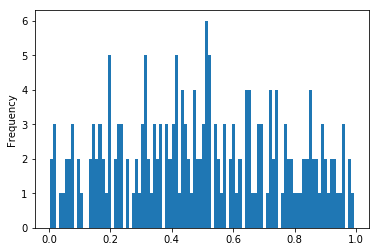

In [7]:
result.probability.plot.hist(bins=100)

In [3]:
result2 = pd.read_csv('./Micromonas/shred.fa.score_with_algea',sep=' ',header=None,names=['probability','prediction'])

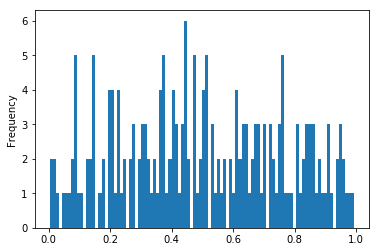

In [5]:
result2.probability.plot.hist(bins=100)

In [2]:
result3 = pd.read_csv('./Micromonas/shred.fa.score_with_euk_virus',sep=' ',header=None,names=['probability','prediction'])

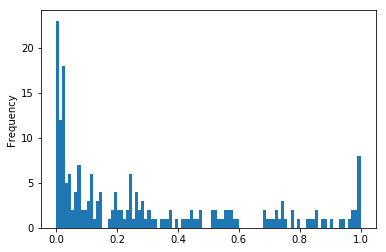

In [3]:
result3.probability.plot.hist(bins=100)

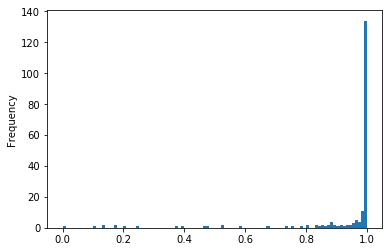

In [4]:
result4 = pd.read_csv('./Micromonas/shred.fa.vect.libsvm.spark_score',sep=' ',header=None,names=['probability','prediction'])
result4.probability.plot.hist(bins=100)

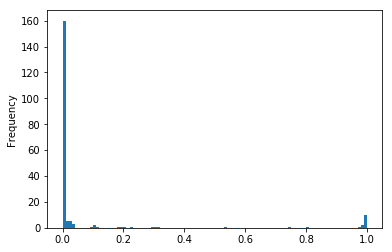

In [5]:
result5 = pd.read_csv('./Micromonas/shred.fa.vect.libsvm.euk_and_non_euk.score',sep=' ',header=None,names=['probability','prediction'])
result5.probability.plot.hist(bins=100)

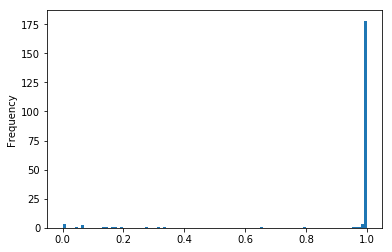

In [6]:
result6 = pd.read_csv('./Micromonas/shred.fa.vect.libsvm.non_euk_non_virus_and_virus.score',sep=' ',header=None,names=['probability','prediction'])
result6.probability.plot.hist(bins=100)

Problem: What data sets did we really use for training, full dataset???

    """
    python /global/homes/q/qpzhang/Github/jgi-ViCA/scripts/sklearn_prediction.py ${libsvm} /global/homes/q/qpzhang/Github/jgi-ViCA/scripts/model/Sklearn/all_segment.fasta.vect.family.training.svmlib.no4.0_1_scikit_model_median_True_1x /global/homes/q/qpzhang/Github/jgi-ViCA/scripts/model/Sklearn/all_segment.fasta.vect.family.training.svmlib.no4.0_1_scikit_scaler_median_True_1x True ${libsvm}.prediction_sklearn
    """
    

family level, training data, not all the data!!!!....!!!!! should use all 

resplitting???? 200 segments from each ....???


In [81]:
algea = pd.read_csv('/Users/qingpeng/algea.vector',sep=' ',header=None)

In [82]:
virus = pd.read_csv('/Users/qingpeng/virus.vector',sep=' ',header=None)

In [94]:
virus

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
0,NaN,0.003896,0.005455,0.005845,0.004676,0.005845,0.007988,0.009156,0.006429,0.006819,...,0.033592,0.019430,0.011658,0.014212,0.006477,0.018135,0.020672,0.009067,0.020725,0.046512
1,NaN,0.023183,0.010325,0.021040,0.020261,0.011299,0.007598,0.002338,0.008377,0.019092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.023768,0.009546,0.020066,0.021430,0.011884,0.007013,0.001559,0.009546,0.019871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.023768,0.009351,0.020066,0.021430,0.012079,0.007013,0.001559,0.009351,0.019871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.020846,0.010131,0.020066,0.020066,0.011494,0.007013,0.001948,0.009351,0.019677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.023183,0.010325,0.021040,0.020456,0.011494,0.007403,0.002338,0.008377,0.019092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.021820,0.010715,0.019092,0.021040,0.012274,0.007403,0.001753,0.009546,0.018313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.022404,0.010520,0.019677,0.021625,0.012274,0.007208,0.001559,0.009936,0.018703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.023768,0.009546,0.020066,0.021430,0.012079,0.007013,0.001559,0.009351,0.019871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.021625,0.010520,0.019092,0.021235,0.012274,0.007403,0.001753,0.009351,0.018313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
nonvirus = pd.read_csv('/Users/qingpeng/nonvirus.vector',sep=' ',header=None)

In [68]:
import seaborn as sns

In [114]:
feature_list = pd.read_csv('/Users/qingpeng/Dropbox/Development/Github/jgi-ViCA/scripts/model/all_segment.fasta.vect.feature_index',sep=' ',header=None)

In [120]:
feature_list[1][0]

'0_AAAA'

In [124]:
feature_list[1][1]

'0_AAAC'

In [ ]:
# 136 4-mers... 36 *4 .. 

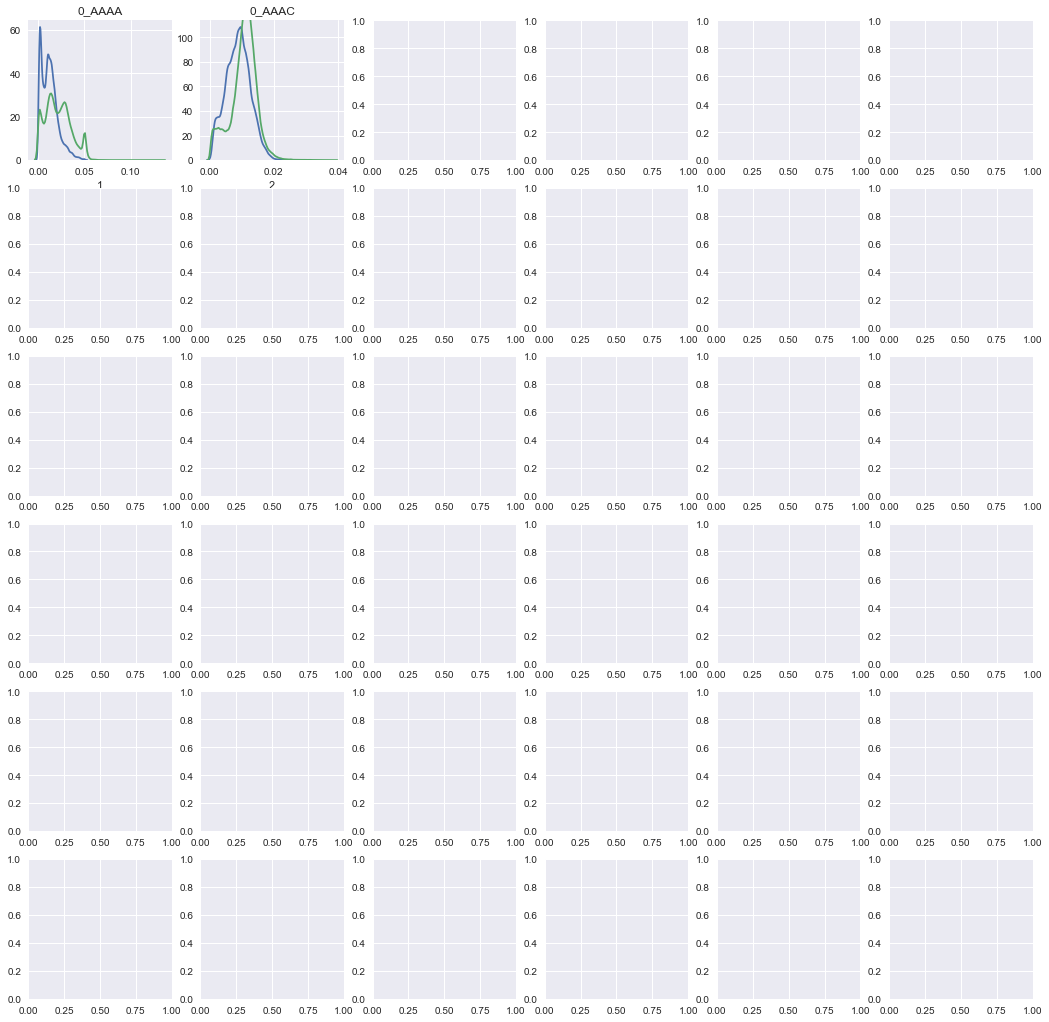

In [125]:
fig, ax_array = plt.subplots(6,6,figsize=(18,18))
#sns.distplot(algea[1],hist=False,ax=ax_array[0,0]);
sns.distplot(virus[1],hist=False,ax=ax_array[0,0]);
sns.distplot(nonvirus[1],hist=False,ax=ax_array[0,0]);
sns.distplot(virus[2],hist=False,ax=ax_array[0,1]);
sns.distplot(nonvirus[2],hist=False,ax=ax_array[0,1]);
ax_array[0,0].set_title(feature_list[1][0])
ax_array[0,1].set_title(feature_list[1][1])
plt.show()

In [69]:
sns.set(color_codes=True)

In [70]:
np.random.seed(sum(map(ord, "distributions")))

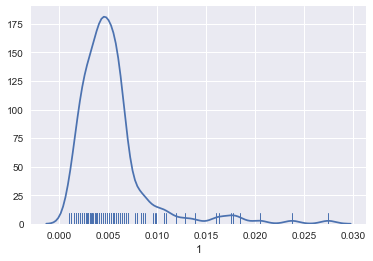

In [76]:

sns.distplot(algea[1],nonvirus[1],hist=False, rug=True);

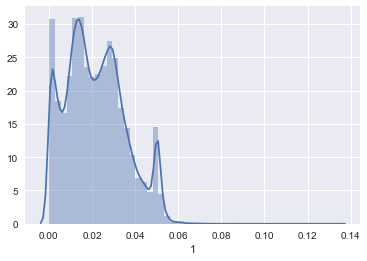

In [74]:
sns.distplot(nonvirus[1]);

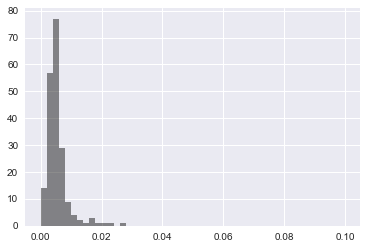

In [100]:
algea[1].hist(color='k', alpha=0.5, bins=50,range=[0,0.1])

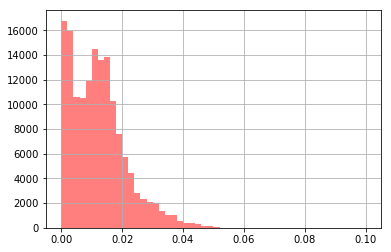

In [45]:
virus[1].hist(color='r', alpha=0.5, bins=50,range=[0,0.1])

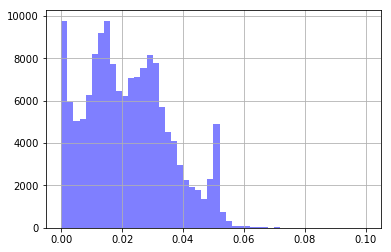

In [46]:
nonvirus[1].hist(color='b', alpha=0.5, bins=50,range=[0,0.1])

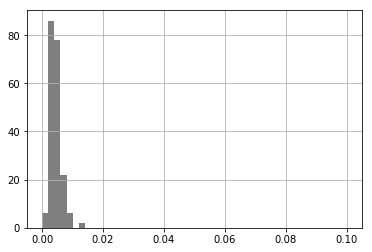

In [47]:
algea[2].hist(color='k', alpha=0.5, bins=50,range=[0,0.1])


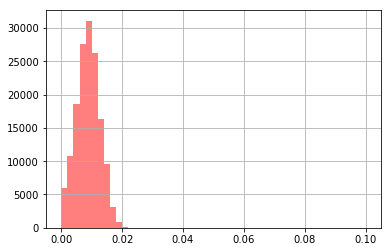

In [48]:
virus[2].hist(color='r', alpha=0.5, bins=50,range=[0,0.1])


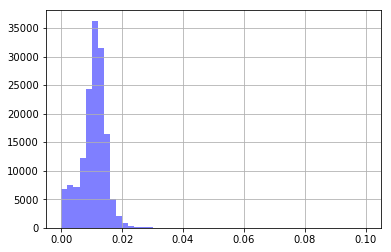

In [49]:
nonvirus[2].hist(color='b', alpha=0.5, bins=50,range=[0,0.1])

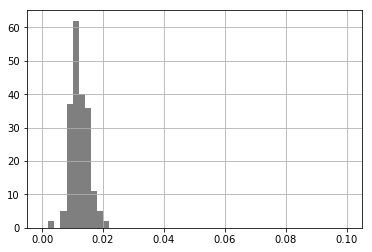

In [50]:
algea[100].hist(color='k', alpha=0.5, bins=50,range=[0,0.1])

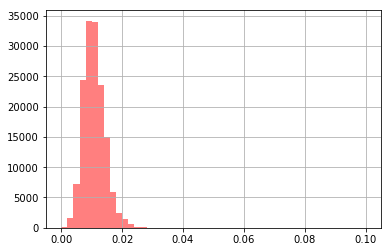

In [51]:
virus[100].hist(color='r', alpha=0.5, bins=50,range=[0,0.1])



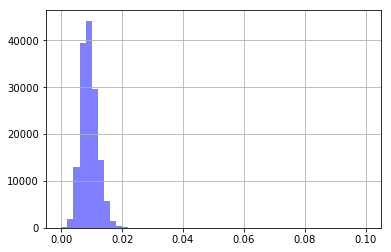

In [52]:
nonvirus[100].hist(color='b', alpha=0.5, bins=50,range=[0,0.1])

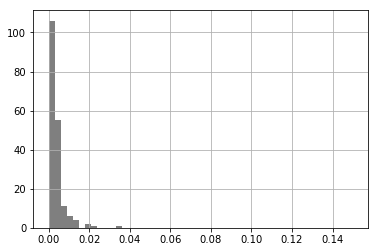

In [53]:
algea[150].hist(color='k', alpha=0.5, bins=50,range=[0,0.15])

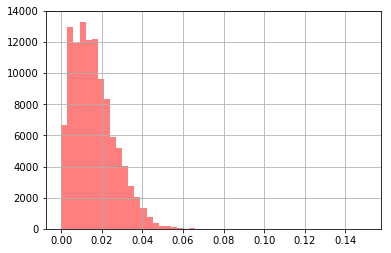

In [54]:
virus[150].hist(color='r', alpha=0.5, bins=50,range=[0,0.15])



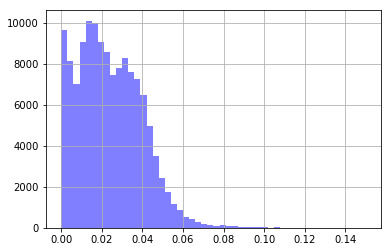

In [55]:
nonvirus[150].hist(color='b', alpha=0.5, bins=50,range=[0,0.15])

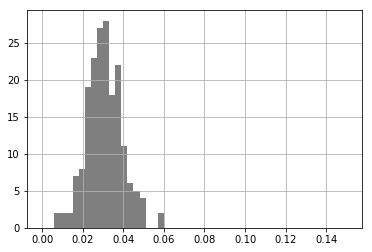

In [56]:
algea[160].hist(color='k', alpha=0.5, bins=50,range=[0,0.15])

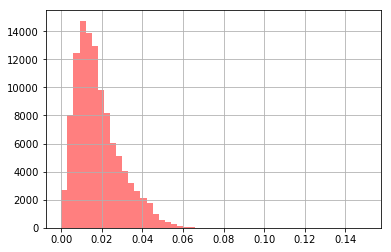

In [57]:
virus[160].hist(color='r', alpha=0.5, bins=50,range=[0,0.15])



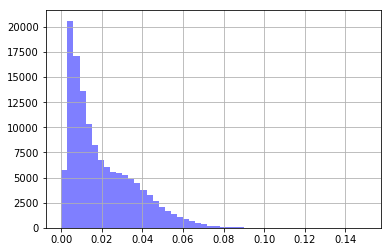

In [58]:
nonvirus[160].hist(color='b', alpha=0.5, bins=50,range=[0,0.15])

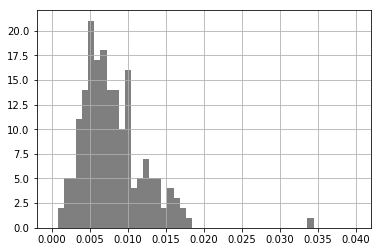

In [62]:
algea[250].hist(color='k', alpha=0.5, bins=50,range=[0,0.04])

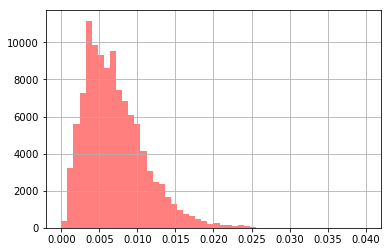

In [63]:
virus[250].hist(color='r', alpha=0.5, bins=50,range=[0,0.04])



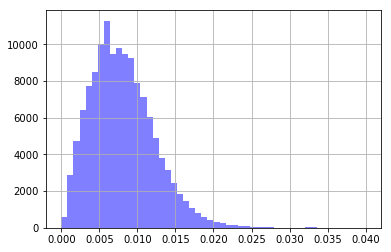

In [64]:
nonvirus[250].hist(color='b', alpha=0.5, bins=50,range=[0,0.04])

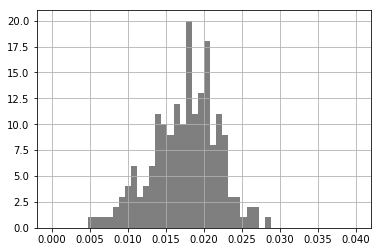

In [65]:
algea[300].hist(color='k', alpha=0.5, bins=50,range=[0,0.04])

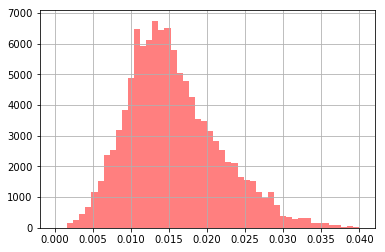

In [66]:
virus[300].hist(color='r', alpha=0.5, bins=50,range=[0,0.04])



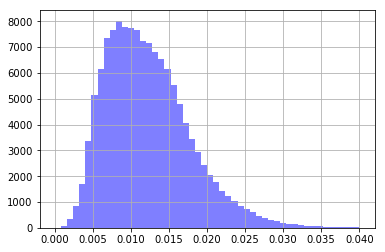

In [67]:
nonvirus[300].hist(color='b', alpha=0.5, bins=50,range=[0,0.04])